## FINAL DEMO

In [82]:
import pandas as pd
from functions import *

df_final_demo = pd.read_csv("df_final_demo.csv")

df_final_demo.head()
df_final_demo.dropna(inplace=True)

mapGenre = {'X' : 'U'}
df_final_demo["gendr"] = replace_values_df(df_final_demo["gendr"], mapGenre)

## WEB DATA

In [83]:
df_web_data1 = pd.read_csv("df_final_web_data_pt_1.csv")
df_web_data2 = pd.read_csv("df_final_web_data_pt_2.csv")

df_web_data_concat = pd.concat([df_web_data1, df_web_data2], axis=0, join='inner')

In [84]:
# Convert type object into datetime 

df_web_data_concat['date_time'] = convert_to_dateTime(df_web_data_concat['date_time'])

df_web_data_concat.dtypes

client_id                int64
visitor_id              object
visit_id                object
process_step            object
date_time       datetime64[ns]
dtype: object

In [85]:
# I turn 'step' into a discrete numeric df

map_values = {'start' : 0, 'step_1' : 1, 'step_2' : 2, 'step_3' : 3, 'confirm' : 4}

df_web_data_concat["process_step"] = replace_values_df(df_web_data_concat["process_step"], map_values)

## FINAL EXP

In [86]:
df_final_exp = pd.read_csv("df_final_experiment_clients.csv")
df_final_exp.rename(columns={"Variation" : "variation"}, inplace=True)

In [87]:
df_final_exp = drop_na_df(df_final_exp, "variation")

In [88]:
map_values2 = {'Control': 0, 'Test': 1}

df_final_exp["variation"] = replace_values_df(df_final_exp["variation"], map_values2)

## MERGE

In [89]:
df_temp1 = pd.merge(df_final_demo, df_web_data_concat, on='client_id', how='inner')

df_all = pd.merge(df_temp1, df_final_exp, on='client_id', how='inner')

In [90]:
df_all = df_all.drop("clnt_tenure_yr", axis=1)      # We don´t need this column because is derivative from clnt_tenure_mnth

In [91]:
df_all_no_duplicates = df_all.copy()
df_all_no_duplicates.drop_duplicates(subset="client_id", inplace=True)

# El datafram pero sin los duplicados

## QUITAMOS OUTLIERS DEL DF_ALL Y DEL QUE NO TIENE DUPLICADOS

In [92]:
df_all = outlier_slayer(df_all)

df_all_no_duplicates = outlier_slayer(df_all_no_duplicates)

# VER SI SON JOVENES O NO

In [93]:
df_all_no_duplicates["clnt_age"].describe()

count    34931.000000
mean        46.057213
std         15.322921
min         17.000000
25%         32.500000
50%         46.000000
75%         58.500000
max         96.000000
Name: clnt_age, dtype: float64

In [94]:
df_all["clnt_age"].mode()

0    59.5
Name: clnt_age, dtype: float64

<Axes: ylabel='clnt_age'>

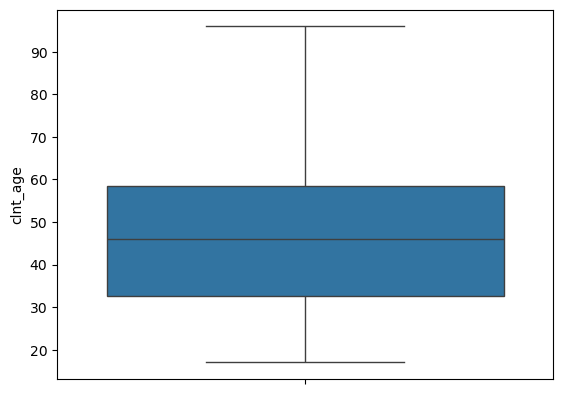

In [95]:
import seaborn as sns

sns.boxplot(data = df_all_no_duplicates['clnt_age'])

In [96]:
Q1 = df_all_no_duplicates['clnt_age'].quantile(0.25)
Q3 = df_all_no_duplicates['clnt_age'].quantile(0.75)
IQR = Q3 - Q1


inf_lim = Q1 - 1.5*IQR
sup_lim = Q3 + 1.5*IQR

inf_lim, sup_lim

(-6.5, 97.5)

In [97]:
# age_outliers = df_all_no_duplicates['clnt_age'][(df_all_no_duplicates['clnt_age'] < inf_lim) | (df_all_no_duplicates['clnt_age'] > sup_lim) ]

# age_outliers         # THERE ARE NO OUTLIERS ON Client Age column

# VER SI SON NUEVOS O ANTIGUOS

In [98]:
df_all_no_duplicates["clnt_tenure_mnth"].describe()

count    34931.000000
mean       137.713521
std         68.669962
min         33.000000
25%         79.000000
50%        123.000000
75%        181.000000
max        357.000000
Name: clnt_tenure_mnth, dtype: float64

In [99]:
df_all["clnt_tenure_mnth"].mode()

0    58.0
Name: clnt_tenure_mnth, dtype: float64

<Axes: ylabel='clnt_tenure_mnth'>

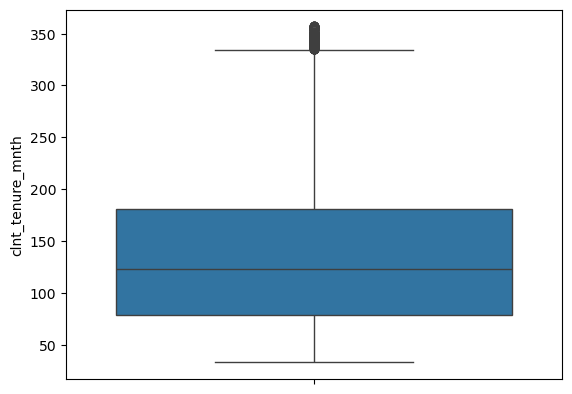

In [100]:
sns.boxplot(data = df_all_no_duplicates['clnt_tenure_mnth'])            # Seguimos teniendo outliers pero dar una segunda pasada es contraproducente en principio.

In [101]:
Q1 = df_all_no_duplicates['clnt_tenure_mnth'].quantile(0.25)
Q3 = df_all_no_duplicates['clnt_tenure_mnth'].quantile(0.75)
IQR = Q3 - Q1


inf_lim = Q1 - 1.5*IQR
sup_lim = Q3 + 1.5*IQR

inf_lim, sup_lim

(-74.0, 334.0)